## Microsoft Movie Project Anaylsis

![example](images/director_shot.jpeg)

## Overview

Attempting to use a statistical analysis, visualizations, and others to make a business recommendations to Microsoft. The analysis will help to tell prospective movie studio what kind of films to make and when is the optimal time to release them. 

## Business Problem

There are a multitude of options when setting out to make a movie studio from scratch, but we can focus on both profitability and return-on-investment (ROI), to understand the most successful films from the past ten years. 
<!-- ***
Questions to consider?
* What is the measure of a successful film?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
*** -->

## Data Understanding

"The Numbers" dataset provided movie titles, release dates, production budgets, domestic US grosses, and worldwide grosses for 5,782 films stretching back to April 1915. This financial basis offered the best starting place. This data merged with a data set obtained from the Rotten Tomatoes API provided run times, genre information, and director information as well as Rotten Tomatoes highly regarded critic aggregation score and audience aggregation sentiment. 



<!-- ***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
*** -->

In [1373]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import difflib 

# pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-1373-c7e93f513c7b>, line 2)

In [1166]:
tn_movie_budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
rt_movie_info_df = pd.read_csv("zippedData/rotten_tomatoes_movies.csv")


In [1167]:
tn_movie_budgets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [1168]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

### Financial Data

The financial dataset includes from February 1915 to December of 2020. Production budget, domestic gross, and worldwide gross are available for all entries.

In [1169]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Movie MetaData

This dataset is an expansive dataset with entries dating from June 1914 to September 2020. It includes a variety of information about each movie title.

In [1170]:
rt_movie_info_df['original_release_date'] = pd.to_datetime(rt_movie_info_df['original_release_date'])
rt_movie_info_df['original_release_date'].describe(datetime_is_numeric=True)

count                            16546
mean     2000-01-27 06:43:23.070228480
min                1914-06-01 00:00:00
25%                1993-05-08 18:00:00
50%                2006-10-27 00:00:00
75%                2013-11-01 00:00:00
max                2020-09-30 00:00:00
Name: original_release_date, dtype: object

## Data Preparation

<!-- Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
*** -->

### Data Cleaning and Filtering

Data Cleaning was a major hurdle with these datasets. The budget and gross columns in the financial dataset needed to be converted to a workable format.

In [1171]:
#created a function that converts the financial object columns to floats.
def changegross(gross):
    gross = gross.strip("$")
    gross = gross.replace(',','')
    gross = float(gross)
    return gross


In [1172]:
#Made a copy of the financial dataset to work with in this notebook.
adjusted_movie_budgets_df = tn_movie_budgets_df.copy()

In [1173]:
#Ran the function on the movie budgets dataframe
adjusted_movie_budgets_df['production_budget'] = adjusted_movie_budgets_df['production_budget'].map(changegross)
adjusted_movie_budgets_df['domestic_gross'] = adjusted_movie_budgets_df['domestic_gross'].map(changegross)
adjusted_movie_budgets_df['worldwide_gross'] = adjusted_movie_budgets_df['worldwide_gross'].map(changegross)

I would like to restrict the dataframe to a ten-year range. I first have to change the 'release date' column to a datetime series to explore it.

In [1174]:
adjusted_movie_budgets_df['release_date'] = pd.to_datetime(adjusted_movie_budgets_df['release_date'])

Text(0.5, 1.0, 'Movie Releases')

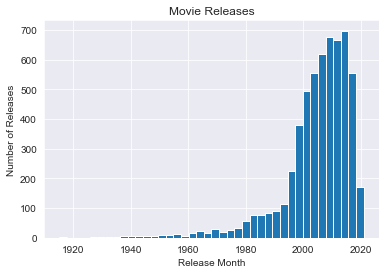

In [1341]:
ax = adjusted_movie_budgets_df['release_date'].hist(bins=40)
ax.set_ylabel("Number of Releases")
ax.set_xlabel("Release Month")
ax.set_title("Movie Releases")


It appears there a low number of entries around 2020, so I further explore the data set to ensure it's a complete ten year set of data.

In [1176]:
adjusted_movie_budgets_df[adjusted_movie_budgets_df.release_date > '2020-01-01']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,2020-12-31,Moonfall,"150,000,000.00",0.00,0.00
535,36,2020-02-21,Call of the Wild,"82,000,000.00",0.00,0.00
1205,6,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00


There are only three entries after January 1, 2020 with no financial data, so a ten year look will have to be at least from 2009 to 2019. It's best to do a check on 2019 as well.

In [1177]:
adjusted_movie_budgets_df[adjusted_movie_budgets_df.release_date > '2019-01-01']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00"
80,81,2019-05-24,Aladdin,"182,000,000.00","246,734,314.00","619,234,314.00"
95,96,2019-03-08,Captain Marvel,"175,000,000.00","426,525,952.00","1,123,061,550.00"
121,22,2019-03-29,Dumbo,"170,000,000.00","113,883,318.00","345,004,422.00"
123,24,2019-02-14,Alita: Battle Angel,"170,000,000.00","85,710,210.00","402,976,036.00"
...,...,...,...,...,...,...
4135,36,2019-02-08,The Prodigy,"6,000,000.00","14,856,291.00","19,789,712.00"
4265,66,2019-05-31,MA,"5,000,000.00","36,049,540.00","44,300,625.00"
4534,35,2019-06-07,Late Night,"4,000,000.00","246,305.00","246,305.00"
5037,38,2019-04-23,Living Dark: The Story of Ted the Caver,"1,750,000.00",0.00,0.00


There are only 70 entries from 2019, some appear not to have financial data as well, perhaps the dataset predates the release of these films. 

In [1178]:
adjusted_movie_budgets_df[adjusted_movie_budgets_df.release_date > '2018-01-01']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00"
6,7,2018-04-27,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00"
11,12,2018-05-25,Solo: A Star Wars Story,"275,000,000.00","213,767,512.00","393,151,347.00"
41,42,2018-02-16,Black Panther,"200,000,000.00","700,059,566.00","1,348,258,224.00"
43,44,2018-06-15,Incredibles 2,"200,000,000.00","608,581,744.00","1,242,520,711.00"
...,...,...,...,...,...,...
5176,77,2018-02-06,Blood Feast,"1,200,000.00","8,708.00","8,708.00"
5228,29,2018-07-20,Unfriended: Dark Web,"1,000,000.00","8,866,745.00","16,434,588.00"
5400,1,2018-12-14,That Way Madness Lies,"650,000.00","1,447.00","1,447.00"
5466,67,2018-05-11,Higher Power,"500,000.00",528.00,528.00


In order to get a sense of the year spread of the dataset, I will make a 'column' to get a sense of the distrubution.

In [1179]:
adjusted_movie_budgets_df['release_year']=pd.DatetimeIndex(adjusted_movie_budgets_df['release_date']).year

In [1180]:
adjusted_movie_budgets_df['release_year'].value_counts().sort_index(ascending=False).head(20)

2020      3
2019     67
2018    143
2017    168
2016    219
2015    338
2014    255
2013    238
2012    235
2011    254
2010    274
2009    239
2008    264
2007    220
2006    260
2005    223
2004    206
2003    201
2002    210
2001    181
Name: release_year, dtype: int64

In order to have at least ten years of data, I will include all entries from 2009 to 2020, realizing 2019 is possibly incomplete, and will look carefully at those entries.

In [1181]:
#Keeping only financial entries after January 1, 2008.
filtered_budgets = adjusted_movie_budgets_df.loc[adjusted_movie_budgets_df['release_year']>2008,:].copy()


In [1182]:
filtered_budgets.sort_values(by='release_date').tail(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
95,96,2019-03-08,Captain Marvel,"175,000,000.00","426,525,952.00","1,123,061,550.00",2019
3990,91,2019-03-15,Five Feet Apart,"7,000,000.00","45,729,221.00","80,504,421.00",2019
2296,97,2019-03-15,Captive State,"25,000,000.00","5,958,315.00","8,993,300.00",2019
393,94,2019-03-15,Wonder Park,"100,000,000.00","45,216,793.00","115,149,422.00",2019
2487,88,2019-03-22,Us,"20,000,000.00","175,006,930.00","254,210,310.00",2019
4132,33,2019-03-29,Unplanned,"6,000,000.00","18,107,621.00","18,107,621.00",2019
121,22,2019-03-29,Dumbo,"170,000,000.00","113,883,318.00","345,004,422.00",2019
2460,61,2019-04-05,Pet Sematary,"21,000,000.00","54,724,696.00","109,501,146.00",2019
3633,34,2019-04-05,The Best of Enemies,"10,000,000.00","10,205,616.00","10,205,616.00",2019
496,97,2019-04-05,Shazam!,"85,000,000.00","139,606,856.00","362,899,733.00",2019


There are many entries without any grosses, it appears the data might not be totally up to date. The 'Men in Black: International' entry looks suspect in its gross, as does the "Shaft" entry. I'm going to do some Google checks on some of the data.

Checking against available internet totals, data after May 10, 2019 appears to be incomplete to the box office. In order to have integrity with the data, I'm going to slice off entries before May 10, 2019.

In [1183]:
filtered_budgets = filtered_budgets.loc[filtered_budgets['release_date']<'2019-05-11',:].copy()


In [1184]:
filtered_budgets.sort_values(by='release_date').tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
3871,72,2019-05-03,The Intruder,"8,000,000.00","35,095,904.00","36,005,871.00",2019
1305,6,2019-05-03,UglyDolls,"45,000,000.00","19,894,664.00","24,644,664.00",2019
1474,75,2019-05-03,Long Shot,"40,000,000.00","30,202,860.00","43,711,031.00",2019
2325,26,2019-05-10,The Professor and the Madman,"25,000,000.00",0.00,"5,227,233.00",2019
175,76,2019-05-10,PokÃ©mon: Detective Pikachu,"150,000,000.00","139,507,806.00","411,258,433.00",2019


I also want to eliminate any grosses with 0 dollar values. I am interested in movies that lose money, but without a domestic or worldwide gross, the data isn't very valueable.

In [1186]:
filtered_budgets =  filtered_budgets[(filtered_budgets['domestic_gross']!=0) | (filtered_budgets['worldwide_gross']!=0)].copy()

I am not spending as much time on the Rotten Tomatoes dataframe, but I am filtering out entires before 200, as they are not going to be left merged upon. Any null values in needed columns will be dealt with later.

In [1363]:
years = filtered_budgets['release_year'].value_counts().index
years = sorted(list(years))

Text(0.5, 1.0, 'Movie Year (2009-2019)')

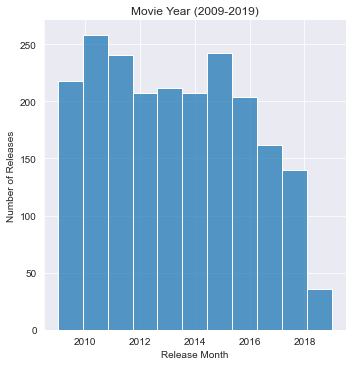

In [1371]:
g = sns.displot(data=filtered_budgets,x='release_year',bins=11)
g.ax.set_ylabel("Number of Releases")
g.ax.set_xlabel("Release Month")
g.ax.set_title("Movie Year (2009-2019)")

In [1372]:
len(filtered_budgets)

2127

In [1187]:
#Keeping only Rotton Tomatoes entries after January 1, 2011.
rt_movie_info_df = rt_movie_info_df[rt_movie_info_df['original_release_date']>'2008-12-31']

#Making a copy of Rotton Tomataoes dataframe with desired columns.
rt_filtered_df = rt_movie_info_df[['movie_title','original_release_date','genres','runtime',
                                   'tomatometer_rating','audience_rating','directors','content_rating'
                                   ,'production_company']].copy()

### Feature Engineering

#### Adjusting for Inflation

Over a ten-year span, inflationary changes, need to be accounted for. I was able to find a someone who encountered a similar problem and dealt with it using a Consumer Price Index Package.

In [210]:
import cpi

The following is function borrowed from a medium post:
https://medium.com/analytics-vidhya/adjusting-for-inflation-when-analysing-historical-data-with-python-9d69a8dcbc27


In [1190]:
#Function that inflates a dataframe column
def inflate_column(data, column):
    """
    Adjust for inflation the series of values in column of the   
    dataframe data
    """
    return data.apply(lambda x: cpi.inflate(x[column],int(x.release_year)),axis=1)


In [1191]:
inflate_column(filtered_budgets,'production_budget')
inflate_column(filtered_budgets,'domestic_gross')
inflate_column(filtered_budgets,'worldwide_gross')

0      3,349,299,645.30
1      1,203,123,127.39
3      1,532,022,794.90
4      1,390,266,286.16
5      2,242,115,671.70
             ...       
5740          11,645.88
5744           3,745.12
5748         534,828.97
5760         137,196.32
5772           5,167.34
Length: 2127, dtype: float64

I create new financial columns that display total gross, profit/loss, and a simple measure of return-on-investment (ROI).  

In [1192]:
#Combining domestic gross and worldwide gross

# # #Creating a profit/loss
filtered_budgets['profit/loss'] = filtered_budgets['worldwide_gross']-filtered_budgets['production_budget']

# # # Creating a measure of roi.
filtered_budgets['roi']=filtered_budgets['profit/loss']/filtered_budgets['production_budget']*100

filtered_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit/loss,roi
0,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,"2,351,345,279.00",553.26
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011,"635,063,875.00",154.67
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015,"1,072,413,963.00",324.38


I also chose to create a column displaying the release month for later exploration. 

In [1193]:
#Extracting the month name from the 'release_date' column
filtered_budgets['release_month'] = pd.DatetimeIndex(filtered_budgets['release_date']).month_name()
#Checking the number of films realeased each month in the filtered dataframe.
filtered_budgets['release_month'].value_counts()


December     217
October      211
September    193
April        189
November     182
March        182
August       178
June         163
July         163
February     156
May          151
January      142
Name: release_month, dtype: int64

### Merging Datasets

Merging datasets proved to be one of the most difficult parts of this project. There were several issues. There is no unique identifier common to the datasets, I tried to explore other datasets, but ultimately they lacked the valuable financial entries supplied in "The Numbers" dataset. 

Previous merges on common titles proved problematic as many movies share the same title with other movies. I attempted to create a column with movie titles concatinated with their release year, but even that created problematic duplicates after merging.  

Both datasets had release date information, so I created a column in both datasets to merge on that concatinated movie title with release date, but in some instances there were mismatches by a day or two (this is common in the film industry. 

The solution was to create a common column movie title and release year and month. There were no issues of duplicates in this attempt.

In [1194]:
#Creating a string of the release date.
rt_filtered_df['release_string'] = rt_filtered_df['original_release_date'].map(lambda x: str(x))

#Keeping only the year and month information from the release string
rt_filtered_df['release_string']=rt_filtered_df['release_string'].map(lambda x: x[:7])

#Creating a new "movie_year" column to merge on
rt_filtered_df['movie_year'] = rt_filtered_df['movie_title']+" ("+rt_filtered_df['release_string']+')'

In [1195]:
#Creating a string of the relase date
filtered_budgets['release_string'] = filtered_budgets['release_date'].map(lambda x: str(x))

#Keeping only the year and month from the release string
filtered_budgets['release_string']= filtered_budgets['release_string'].map(lambda x: x[:7])

#Creating a new "movie_year" column to merge on
filtered_budgets['movie_year'] = filtered_budgets['movie']+" ("+filtered_budgets['release_string']+')'


I chose to left merge because I'm chiefly concerned with preserving financial data.

In [1196]:
#Left merging on the filtered 2011 financial dataset.
filter_merge = filtered_budgets.merge(rt_filtered_df,how='left',on='movie_year')

Running a check of the merged dataset reveals problems with the merge, there are hundreds of entries with null values from the Rotten Tomatoes dataframe. This will lead to furuther  investigation.

In [1197]:
filter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2126
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2127 non-null   int64         
 1   release_date           2127 non-null   datetime64[ns]
 2   movie                  2127 non-null   object        
 3   production_budget      2127 non-null   float64       
 4   domestic_gross         2127 non-null   float64       
 5   worldwide_gross        2127 non-null   float64       
 6   release_year           2127 non-null   int64         
 7   profit/loss            2127 non-null   float64       
 8   roi                    2127 non-null   float64       
 9   release_month          2127 non-null   object        
 10  release_string_x       2127 non-null   object        
 11  movie_year             2127 non-null   object        
 12  movie_title            1562 non-null   object        
 13  ori

Clearly there were issues with the merge, as there are many null entries in the genre column which is important for analysis. I will need to explore the merged dataframe to get a sense of what went wrong.

In [1198]:
#Checking the merged entries with null "genres" entries
filter_merge[filter_merge['genres'].isna()].head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit/loss,roi,release_month,...,movie_title,original_release_date,genres,runtime,tomatometer_rating,audience_rating,directors,content_rating,production_company,release_string_y
3,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017,"999,721,747.00",315.37,December,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
4,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000.00","936,662,225.00","2,053,311,220.00",2015,"1,747,311,220.00",571.02,December,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
21,27,2012-05-04,The Avengers,"225,000,000.00","623,279,547.00","1,517,935,897.00",2012,"1,292,935,897.00",574.64,May,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
27,35,2012-05-25,Men in Black 3,"215,000,000.00","179,020,854.00","654,213,485.00",2012,"439,213,485.00",204.29,May,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
37,49,2017-05-05,Guardians of the Galaxy Vol 2,"200,000,000.00","389,813,101.00","862,316,233.00",2017,"662,316,233.00",331.16,May,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
45,58,2010-12-17,Tron: Legacy,"200,000,000.00","172,062,763.00","400,062,763.00",2010,"200,062,763.00",100.03,December,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
50,63,2010-05-28,Prince of Persia: Sands of Time,"200,000,000.00","90,759,676.00","336,359,676.00",2010,"136,359,676.00",68.18,May,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
58,71,2009-11-06,Disneyâs A Christmas Carol,"190,000,000.00","137,855,863.00","315,709,697.00",2009,"125,709,697.00",66.16,November,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
72,92,2018-07-27,Mission: ImpossibleâFallout,"178,000,000.00","220,159,104.00","787,456,552.00",2018,"609,456,552.00",342.39,July,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
75,95,2014-06-06,Edge of Tomorrow,"178,000,000.00","100,206,256.00","370,541,256.00",2014,"192,541,256.00",108.17,June,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN


It appears the issue with some of the entries may be encoding issues with the data frame for example:

"The Huntsman: Winterâs War"
"Assassinâs Creed"
"Mission: ImpossibleâGhost Protocol"

However, some entries do not suffer from this issue and still haven't merged like:

"Star Wars Ep. VIII: The Last Jedi"

I chose to see if part of the title was in the Rotten Tomatoes Dataframe.

In [1199]:
#Checking to see if the Rotton Tomatoes Dataframe contains a partial title match.

rt_filtered_df[rt_filtered_df['movie_title'].str.contains('The Last Jedi')]

,movie_title,original_release_date,genres,runtime,tomatometer_rating,audience_rating,directors,content_rating,production_company,release_string,movie_year
13800,Star Wars: The Last Jedi,2017-12-15,"Action & Adventure, Drama, Science Fiction & F...",152.00,90.00,43.00,Rian Johnson,PG-13,Walt Disney Pictures,2017-12,Star Wars: The Last Jedi (2017-12)


It appears the issue with the merge might be syntax and encoding issues. I will do my best to resolve this before going further. I create a dataframe of the entries that did not merge to work from.

In [1200]:
missing_genre = filter_merge[filter_merge.genres.isnull()]
missing_genre.reset_index(inplace=True,drop='index')


It would not be advisable to lose these valuable entries. I was able to both find a solution for the encoding issues and the semantic mismatched titles and borrowed code to do so. 



#### Fixing Encoding with ftfy

Ftfy is a package I found that takes in improperly encoded characters and returns properly encoded characters. I will create a lambda function and clean the neccesary columns.

In [279]:
#importing ftfy
import ftfy

In [1201]:
#applying ftfy to the movie column in filtered_2011
filtered_budgets['movie'] = filtered_budgets['movie'].map(lambda x: ftfy.fix_text(x))

#applying ftfy to the movie_year column that I will be merging on
filtered_budgets['movie_year'] = filtered_budgets['movie_year'].map(lambda x: ftfy.fix_text(x))

I'll check for the "â" character to make sure the function did its job.

In [1202]:
filtered_budgets[filtered_budgets['movie_year'].str.contains('â')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit/loss,roi,release_month,release_string,movie_year


Now I can attempt to run the merge again with the the cleaned columns and check the number of null values.

In [1203]:
#Left merging on the filtered 2011 financial dataset.
filter_merge = filtered_budgets.merge(rt_filtered_df,how='left',on='movie_year')
filter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2126
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2127 non-null   int64         
 1   release_date           2127 non-null   datetime64[ns]
 2   movie                  2127 non-null   object        
 3   production_budget      2127 non-null   float64       
 4   domestic_gross         2127 non-null   float64       
 5   worldwide_gross        2127 non-null   float64       
 6   release_year           2127 non-null   int64         
 7   profit/loss            2127 non-null   float64       
 8   roi                    2127 non-null   float64       
 9   release_month          2127 non-null   object        
 10  release_string_x       2127 non-null   object        
 11  movie_year             2127 non-null   object        
 12  movie_title            1599 non-null   object        
 13  ori

I'll once again check to see the missing values

In [1204]:
#Checking the merged entries with null "genres" entries
filter_merge[filter_merge['genres'].isna()].head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit/loss,roi,release_month,...,movie_title,original_release_date,genres,runtime,tomatometer_rating,audience_rating,directors,content_rating,production_company,release_string_y
3,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017,"999,721,747.00",315.37,December,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
4,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000.00","936,662,225.00","2,053,311,220.00",2015,"1,747,311,220.00",571.02,December,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
21,27,2012-05-04,The Avengers,"225,000,000.00","623,279,547.00","1,517,935,897.00",2012,"1,292,935,897.00",574.64,May,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
27,35,2012-05-25,Men in Black 3,"215,000,000.00","179,020,854.00","654,213,485.00",2012,"439,213,485.00",204.29,May,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
37,49,2017-05-05,Guardians of the Galaxy Vol 2,"200,000,000.00","389,813,101.00","862,316,233.00",2017,"662,316,233.00",331.16,May,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
45,58,2010-12-17,Tron: Legacy,"200,000,000.00","172,062,763.00","400,062,763.00",2010,"200,062,763.00",100.03,December,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
50,63,2010-05-28,Prince of Persia: Sands of Time,"200,000,000.00","90,759,676.00","336,359,676.00",2010,"136,359,676.00",68.18,May,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
72,92,2018-07-27,Mission: Impossible—Fallout,"178,000,000.00","220,159,104.00","787,456,552.00",2018,"609,456,552.00",342.39,July,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
75,95,2014-06-06,Edge of Tomorrow,"178,000,000.00","100,206,256.00","370,541,256.00",2014,"192,541,256.00",108.17,June,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
83,3,2018-11-21,Ralph Breaks The Internet,"175,000,000.00","201,091,711.00","524,283,695.00",2018,"349,283,695.00",199.59,November,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN


#### Using Fuzzy Matching to Create a Better Merge

Another problem on this merge seems to be titles that don't exactly match. I found a medium post about "fuzzy matching." This post explains it in detail:

https://medium.com/@rtjeannier/combining-data-sets-with-fuzzy-matching-17efcb510ab2

The fuzzy matching algorithm will assign a match score to the missing entries.

The function is rather taxing, and does take several minutes to output in the cell.

In [165]:
from fuzzywuzzy import fuzz

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [329]:
#This is code borrowed from a user that encountered a similar problem. His blog
# post and original code can be found here:
# https://medium.com/@rtjeannier/combining-data-sets-with-fuzzy-matching-17efcb510ab2

#This function takes in a list and assigns a score for how well the names matched
# another name.

def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

In [1205]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in missing_genre.movie_year:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, rt_filtered_df.movie_year, 80)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"movie_name" : name})
    dict_.update({"match_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table = pd.DataFrame(dict_list)
# Display results
merge_table
dict_list


[{'movie_name': 'Star Wars Ep. VIII: The Last Jedi (2017-12)',
  'match_name': 'Star Wars: The Last Jedi (2017-12)',
  'score': 88},
 {'movie_name': 'Star Wars Ep. VII: The Force Awakens (2015-12)',
  'match_name': 'Star Wars: Episode VII - The Force Awakens (2015-12)',
  'score': 90},
 {'movie_name': 'The Avengers (2012-05)',
  'match_name': "Marvel's The Avengers (2012-05)",
  'score': 83},
 {'movie_name': 'Men in Black 3 (2012-05)',
  'match_name': 'Men in Black III (2012-05)',
  'score': 92},
 {'movie_name': 'Guardians of the Galaxy Vol 2 (2017-05)',
  'match_name': 'Guardians of the Galaxy Vol. 2 (2017-05)',
  'score': 99},
 {'movie_name': 'Tron: Legacy (2010-12)',
  'match_name': 'Tron Legacy (2010-12)',
  'score': 98},
 {'movie_name': 'Prince of Persia: Sands of Time (2010-05)',
  'match_name': 'Prince of Persia: The Sands of Time (2010-05)',
  'score': 95},
 {'movie_name': 'Disneyâ\x80\x99s A Christmas Carol (2009-11)',
  'match_name': "Disney's A Christmas Carol (2009-11)",
  

The fuzzy algorithm was able to identify many instances where a merge should've taken place due to an error in syntax, spelling, or other. I can now make a dictionary to replace those values in the filtered financial dataframe and attempt another merge. If the matches are over an 85 score I shall keep them.

In [1207]:
#Creating dictionary keys from matches over 80. These are the values to be
#replaced.
replacement_keys = [movie['movie_name'] for movie in dict_list if movie['score'] > 80]

#Creating a dictionary of corresponding values that will match on the next merge.
replacement_values = [movie['match_name'] for movie in dict_list if movie['score'] > 80]

#Using a dictionary comprehension to make a replacement dictionary.
replacement_dict = { k:v for (k,v) in zip(replacement_keys, replacement_values)}

This replacement dictionary can help create a better financial dataframe for merging.

In [1208]:
#Passing a dictionary to replace the highly scored matches.
filtered_budgets.replace({"movie_year": replacement_dict},inplace=True)

#Running the merge again
filter_merge = filtered_budgets.merge(rt_filtered_df,how='left',on='movie_year')

In [1209]:
#Checking to see if there are less null values.
filter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2126
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2127 non-null   int64         
 1   release_date           2127 non-null   datetime64[ns]
 2   movie                  2127 non-null   object        
 3   production_budget      2127 non-null   float64       
 4   domestic_gross         2127 non-null   float64       
 5   worldwide_gross        2127 non-null   float64       
 6   release_year           2127 non-null   int64         
 7   profit/loss            2127 non-null   float64       
 8   roi                    2127 non-null   float64       
 9   release_month          2127 non-null   object        
 10  release_string_x       2127 non-null   object        
 11  movie_year             2127 non-null   object        
 12  movie_title            1867 non-null   object        
 13  ori

In [1210]:
1875/2127

0.8815232722143864

This process reduced the number of missing genres values by 133. Another check of the null values will be helpful.

In [1211]:
#Slicing out a series of entries with a missing genre values.
missing_series = filter_merge[filter_merge['genres'].isna()]['movie_year']

#Creating a list from the missing series.
missing_list = [movie for movie in missing_series]

In [1212]:
missing_list

['Mission: Impossible—Fallout (2018-07)',
 'Edge of Tomorrow (2014-06)',
 'Aquaman (2018-12)',
 'Mission: Impossible—Rogue Nation (2015-07)',
 'Pokémon: Detective Pikachu (2019-05)',
 'Mission: Impossible—Ghost Protocol (2011-12)',
 'Mary Poppins Returns (2018-12)',
 'Jin líng shí san chai (2012-01)',
 'The Nutcracker in 3D (2010-11)',
 'Oceans (2010-04)',
 'Astérix et Obélix: Au service de Sa Majesté (2012-12)',
 'The Little Prince (2016-02)',
 'Renegades (2019-01)',
 "Dr. Seuss' The Grinch (2018-11)",
 'Astro Boy (2009-10)',
 'Tian jiang xiong shi (2015-09)',
 'Mei Ren Yu (2016-02)',
 'Jack Reacher: Never Go Back (2016-10)',
 'Xi You Ji zhi Sun Wu Kong San Da Bai Gu Jing (2016-02)',
 'Zhuo yao ji (2016-01)',
 'The Boat That Rocked (2009-11)',
 'Earth (2009-04)',
 'Arthur and the War of Two Worlds (2010-12)',
 'Foodfight! (2012-12)',
 'Brüno (2009-07)',
 'Micmacs (2010-05)',
 "Pourquoi j'ai pas mangé mon père (2015-12)",
 'The Conjuring 2: The Enfield Poltergeist (2016-06)',
 'Baahuba

#### Replacing Titles that Match String Names

For remaining mismatches, I create a loop that checks to see if the titles in the missing list, match any titles in the dataframe I'm looking to merge with. If their is a singular match, I create another replacement dictionary to change the financial dataframe for a better merge.

In [337]:
more_replacement_values= [] 
more_replacement_keys = []

for movie in missing_list:    
    checker = rt_filtered_df['movie_title'].str.contains(movie[:-10])
    if len(rt_filtered_df[checker]['movie_title']) == 1:
        
        more_replacement_keys.append(movie)
        more_replacement_values.append(rt_filtered_df[checker].loc[:,'movie_year'].values[0])

more_replacement_dict = { k:v for (k,v) in zip(more_replacement_keys, more_replacement_values)}

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


I can see in the below dictionary that the titles I'm looking to replace match in both name and month/year of release, so. I can feel confident replacing them in the dataframe for the merge.  

In [174]:
more_replacement_dict

{'Edge of Tomorrow (2014-06)': 'Live Die Repeat: Edge of Tomorrow (2014-06)',
 'Renegades (2019-01)': 'American Renegades (2018-12)',
 'Astro Boy (2009-10)': 'Astro Boy (AstroBoy) (2009-10)',
 'Tian jiang xiong shi (2015-09)': 'Dragon Blade (Tian jiang xiong shi) (2015-09)',
 'The Boat That Rocked (2009-11)': 'Pirate Radio (The Boat That Rocked) (2009-11)',
 'Micmacs (2010-05)': 'Micmacs (Micmacs à tire-larigot) (2010-05)',
 "Molly's Game (2017-12)": "Molly's Game (2018-01)",
 'Ballerina (2017-08)': 'Prima Ballerina (2009-01)',
 'Acrimony (2018-03)': "Tyler Perry's Acrimony (2018-03)",
 "De rouille et d'os (2012-11)": "De rouille et d'os (Rust and Bone) (2012-11)",
 "L'illusionniste (2010-12)": "The Illusionist (L'illusionniste) (2010-12)",
 'Enter the Void (2010-09)': 'Enter the Void (Soudain le vide) (2010-09)',
 'San suk si gin (2010-02)': 'San suk si gin (The Shinjuku Incident) (2009-03)',
 'Reign of Assassins (2016-11)': 'Jianyu (Reign of Assassins) (2010-12)',
 'San qiang pai an 

In [ ]:
#Passing a another dictionary to replace the highly scored matches.
filtered_2011.replace({"movie_year": more_replacement_dict},inplace=True)


In [ ]:
#Running the merge a third time
filter_merge_2011 = filtered_2011.merge(rt_filtered_df,how='left',on='movie_year')

This has increased the number of merged entries from 916 to 924 on the desired columns.

In [1213]:
#Checking to see if there are less null values.
filter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2126
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2127 non-null   int64         
 1   release_date           2127 non-null   datetime64[ns]
 2   movie                  2127 non-null   object        
 3   production_budget      2127 non-null   float64       
 4   domestic_gross         2127 non-null   float64       
 5   worldwide_gross        2127 non-null   float64       
 6   release_year           2127 non-null   int64         
 7   profit/loss            2127 non-null   float64       
 8   roi                    2127 non-null   float64       
 9   release_month          2127 non-null   object        
 10  release_string_x       2127 non-null   object        
 11  movie_year             2127 non-null   object        
 12  movie_title            1867 non-null   object        
 13  ori

In [1214]:
missing_genre = filter_merge[filter_merge.genres.isnull()]
missing_genre

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit/loss,roi,release_month,...,movie_title,original_release_date,genres,runtime,tomatometer_rating,audience_rating,directors,content_rating,production_company,release_string_y
72,92,2018-07-27,Mission: Impossible—Fallout,"178,000,000.00","220,159,104.00","787,456,552.00",2018,"609,456,552.00",342.39,July,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
75,95,2014-06-06,Edge of Tomorrow,"178,000,000.00","100,206,256.00","370,541,256.00",2014,"192,541,256.00",108.17,June,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
108,36,2018-12-21,Aquaman,"160,000,000.00","335,061,807.00","1,146,894,640.00",2018,"986,894,640.00",616.81,December,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
126,68,2015-07-31,Mission: Impossible—Rogue Nation,"150,000,000.00","195,042,377.00","688,858,992.00",2015,"538,858,992.00",359.24,July,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
133,76,2019-05-10,Pokémon: Detective Pikachu,"150,000,000.00","139,507,806.00","411,258,433.00",2019,"261,258,433.00",174.17,May,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,90,2014-06-19,The Past is a Grotesque Animal,"100,000.00","20,056.00","20,056.00",2014,"-79,944.00",-79.94,June,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
2113,2,2015-07-17,Dawn of the Crescent Moon,"75,000.00","8,799.00","8,799.00",2015,"-66,201.00",-88.27,July,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
2115,6,2011-12-31,Absentia,"70,000.00",0.00,"8,555.00",2011,"-61,445.00",-87.78,December,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN
2120,32,2011-02-11,Raymond Did It,"40,000.00","3,632.00","3,632.00",2011,"-36,368.00",-90.92,February,...,NaN,NaT,NaN,nan,nan,nan,NaN,NaN,NaN,NaN


In [177]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in missing_genre.movie_year:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, rt_filtered_df.movie_year, 70)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"movie_name" : name})
    dict_.update({"match_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table = pd.DataFrame(dict_list)
# Display results
merge_table
dict_list

[{'movie_name': 'Star Wars Ep. VIII: The Last Jedi (2017-12)',
  'match_name': 'Star Wars: The Last Jedi (2017-12)',
  'score': 88},
 {'movie_name': 'Star Wars Ep. VII: The Force Awakens (2015-12)',
  'match_name': 'Star Wars: Episode VII - The Force Awakens (2015-12)',
  'score': 90},
 {'movie_name': 'The Avengers (2012-05)',
  'match_name': "Marvel's The Avengers (2012-05)",
  'score': 83},
 {'movie_name': 'Men in Black 3 (2012-05)',
  'match_name': 'Men in Black III (2012-05)',
  'score': 92},
 {'movie_name': 'Guardians of the Galaxy Vol 2 (2017-05)',
  'match_name': 'Guardians of the Galaxy Vol. 2 (2017-05)',
  'score': 99},
 {'movie_name': 'Tron: Legacy (2010-12)',
  'match_name': 'Tron Legacy (2010-12)',
  'score': 98},
 {'movie_name': 'Prince of Persia: Sands of Time (2010-05)',
  'match_name': 'Prince of Persia: The Sands of Time (2010-05)',
  'score': 95},
 {'movie_name': 'Mission: Impossible—Fallout (2018-07)',
  'match_name': 'Mission: Impossible - Fallout (2018-07)',
  'sco

In [1215]:
#Creating dictionary keys from matches over 80. These are the values to be
#replaced.
replacement_keys = [movie['movie_name'] for movie in dict_list if movie['score'] > 80]

#Creating a dictionary of corresponding values that will match on the next merge.
replacement_values = [movie['match_name'] for movie in dict_list if movie['score'] > 80]

#Using a dictionary comprehension to make a replacement dictionary.
replacement_dict = { k:v for (k,v) in zip(replacement_keys, replacement_values)}

In [1216]:
#Passing a dictionary to replace the highly scored matches.
filtered_budgets.replace({"movie_year": replacement_dict},inplace=True)

#Running the merge again
filter_merge = filtered_budgets.merge(rt_filtered_df,how='left',on='movie_year')

In [1217]:
filter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2126
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2127 non-null   int64         
 1   release_date           2127 non-null   datetime64[ns]
 2   movie                  2127 non-null   object        
 3   production_budget      2127 non-null   float64       
 4   domestic_gross         2127 non-null   float64       
 5   worldwide_gross        2127 non-null   float64       
 6   release_year           2127 non-null   int64         
 7   profit/loss            2127 non-null   float64       
 8   roi                    2127 non-null   float64       
 9   release_month          2127 non-null   object        
 10  release_string_x       2127 non-null   object        
 11  movie_year             2127 non-null   object        
 12  movie_title            1867 non-null   object        
 13  ori

### Dropping and Replacing Null Values

We will drop rows the merge couldn't takes place, so dropping rows where genre information wasn't available.

In [1228]:
filter_merge = filter_merge[filter_merge['genres'].notna()]    
filter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 2126
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     1867 non-null   int64         
 1   release_date           1867 non-null   datetime64[ns]
 2   movie                  1867 non-null   object        
 3   production_budget      1867 non-null   float64       
 4   domestic_gross         1867 non-null   float64       
 5   worldwide_gross        1867 non-null   float64       
 6   release_year           1867 non-null   int64         
 7   profit/loss            1867 non-null   float64       
 8   roi                    1867 non-null   float64       
 9   release_month          1867 non-null   object        
 10  release_string_x       1867 non-null   object        
 11  movie_year             1867 non-null   object        
 12  movie_title            1867 non-null   object        
 13  ori

We are still lacking a director information for a few entries as well, since these rows have other information in them, we will just change this to unknown.

In [1221]:
#Changing directors null values to "unknown" string
filter_merge['directors'].fillna(value='Unknown',inplace=True)

#Changing production_company values to "unknown" string
filter_merge['production_company'].fillna(value='Unknown', inplace=True)

The dataframe now contains 1867 entries, excluding the runtime column. Rather than dropping these entries, later I will create a seperate dataframe that excludes these entries for later examination.

In [1222]:
#Saving cleaned dataframe as CSV
# filter_merge = pd.read_csv("zippeddata/cleaned_movie_project_df.csv")
filter_merge.to_csv('zippeddata/cleaned_movie_project_df.csv"')

## Data Modeling


### Time of Year

Taking a look at release months by profitability and return-on-investment,
people think typically movies released in the summer months perform better. However, when subdivided into budget tiers, conventional wisdom is incorrect.


A look at time of year divided into time of year versus return on investment initially yields unsurprsing infomration - 
traditional blockbuster months in early summer and late fall are the best times to release a film on both a pure profit and return on investment.

However, when looking at a budgets below $50,000,000 - ROI is mostly uniform acorss the year.

#### Releases Per Year

I look to create a dataframe that groups financial information by release month with profit, ROI, and a count of movies per month.

In [1235]:
#Creating a data frame that groups each month with aggregate measures.
month_df = filter_merge.groupby(by='release_month').agg(['mean','median','count'])[['profit/loss','roi']]

#Ordering the data frame in month order.
month_df.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])


profit/loss                        roi             
                        mean        median count   mean median count
release_month                                                       
January        49,772,974.22 24,475,771.00   126 359.08 130.57   126
February       79,114,735.82 28,707,924.00   131 252.65 141.50   131
March          84,849,466.08 20,778,864.00   168 208.96 103.23   168
April          68,315,585.31  6,513,739.50   170 277.05  58.52   170
May           153,596,049.91 41,411,721.00   131 232.63 116.95   131
June          150,716,131.06 26,063,544.50   146 285.25 133.44   146
July          141,606,010.40 42,898,100.00   145 616.91 178.81   145
August         56,872,384.46 23,997,067.00   157 226.62  97.37   157
September      41,867,500.66 13,691,606.50   176 435.11  85.28   176
October        48,390,761.59  5,139,730.00   189 297.12  52.47   189
November      138,429,985.40 43,348,218.00   167 254.70 147.61   167
December      133,596,782.82 29,807,260.00   161 205.98 127.70   161

In [1236]:
#Joining column names to create a flatter column heirarchy
month_df.columns = ['_'.join(col) for col in month_df.columns.values]


In [1237]:
#Reseting index to flatting column
month_df.reset_index(inplace=True)
month_df

,release_month,profit/loss_mean,profit/loss_median,profit/loss_count,roi_mean,roi_median,roi_count
0,January,"49,772,974.22","24,475,771.00",126,359.08,130.57,126
1,February,"79,114,735.82","28,707,924.00",131,252.65,141.50,131
2,March,"84,849,466.08","20,778,864.00",168,208.96,103.23,168
3,April,"68,315,585.31","6,513,739.50",170,277.05,58.52,170
4,May,"153,596,049.91","41,411,721.00",131,232.63,116.95,131
5,June,"150,716,131.06","26,063,544.50",146,285.25,133.44,146
6,July,"141,606,010.40","42,898,100.00",145,616.91,178.81,145
7,August,"56,872,384.46","23,997,067.00",157,226.62,97.37,157
8,September,"41,867,500.66","13,691,606.50",176,435.11,85.28,176
9,October,"48,390,761.59","5,139,730.00",189,297.12,52.47,189


I order the dataframe by month order for chart visualization. 

In [1238]:
#Changing the releaes_month to categorical column with a the order of the months.
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
#Making sure the dataframe stays in mnoth order.
month_df['release_month'] = pd.Categorical(month_df['release_month'], categories=months, ordered=True)
month_df = month_df.sort_values(by='release_month')
month_df

,release_month,profit/loss_mean,profit/loss_median,profit/loss_count,roi_mean,roi_median,roi_count
0,January,"49,772,974.22","24,475,771.00",126,359.08,130.57,126
1,February,"79,114,735.82","28,707,924.00",131,252.65,141.50,131
2,March,"84,849,466.08","20,778,864.00",168,208.96,103.23,168
3,April,"68,315,585.31","6,513,739.50",170,277.05,58.52,170
4,May,"153,596,049.91","41,411,721.00",131,232.63,116.95,131
5,June,"150,716,131.06","26,063,544.50",146,285.25,133.44,146
6,July,"141,606,010.40","42,898,100.00",145,616.91,178.81,145
7,August,"56,872,384.46","23,997,067.00",157,226.62,97.37,157
8,September,"41,867,500.66","13,691,606.50",176,435.11,85.28,176
9,October,"48,390,761.59","5,139,730.00",189,297.12,52.47,189


From the resulting chart, movie releases are lower in the start of year, pickup in the spring, but interestingly lower in May. Release then appear to rise in the fall, peaking in October. 

Text(0.5, 1.0, 'Movie Releases per Month Since 2009')

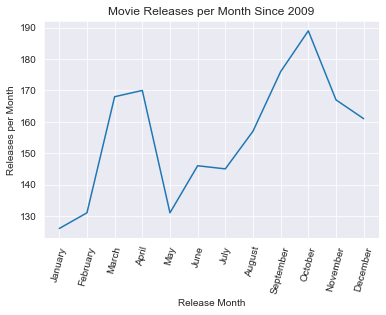

In [1294]:
ax = sns.lineplot(data=month_df, x = 'release_month', y='roi_count')
ax.ticklabel_format(style='plain', axis='y')
ax.tick_params(axis='x',rotation=75)
ax.set_ylabel("Releases per Month")
ax.set_xlabel("Release Month")
ax.set_title("Movie Releases per Month Since 2009")


Again average and median profits follow a seasonal pattern - summertime blockbusters and  big holiday season movies.

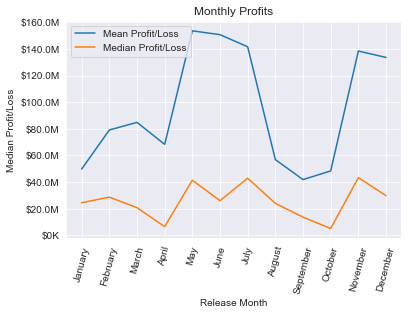

In [1293]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s


h = pd.melt(month_df, id_vars=['release_month'], value_vars=['profit/loss_mean','profit/loss_median'])
ax = sns.lineplot(x="release_month", y="value", hue='variable', data=h,)
ax.tick_params(axis='x',rotation=75)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Median Profit/Loss")
ax.set_xlabel("Release Month")
ax.set_title("Monthly Profits")
ax.yaxis.set_major_formatter(currency)

ax.legend(labels=["Mean Profit/Loss","Median Profit/Loss"])

Profit/Loss mostly moves in the same way for Mean and Median, but differ from the release chart. May looks like a lower release month, but is one of the highest months for Profit/Loss. October looks like the peak release, month, but on the lowest months of profit. Though January and February are low release months, they look to be average months for returns.

Profit/Loss are worth looking at, but I've decided to focus on ROI. These line charts display ROI per month.

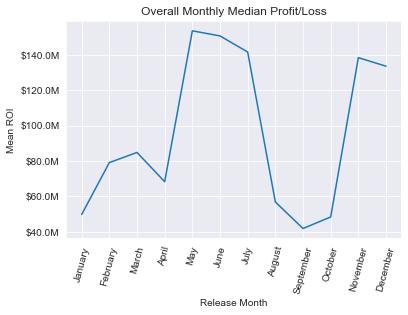

In [1304]:
# h = pd.melt(month_df, id_vars=['release_month'], value_vars=['roi_mean','roi_median'])
cats = ('January','February','March','April','May','June','July','August','September','October','November','December')
filter_merge['release_month'] = pd.Categorical(filter_merge['release_month'], ordered=True, categories=cats)
ax = sns.lineplot(x='release_month',y='profit/loss',data=filter_merge,ci=None)
ax.tick_params(axis='x',rotation=75)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Mean ROI")
ax.set_xlabel("Release Month")
ax.set_title("Overall Monthly Median Profit/Loss")
ax.yaxis.set_major_formatter(currency)

Text(0.5, 1.0, 'Overall Monthly Median ROI (2009 - 2019)')

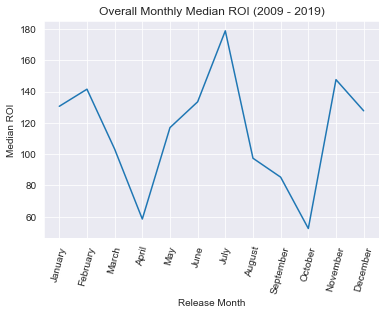

In [1311]:
ax = sns.lineplot(x='release_month',y='roi',data=filter_merge,estimator=np.median, ci=None)
ax.tick_params(axis='x',rotation=75)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Median ROI")
ax.set_xlabel("Release Month")
ax.set_title("Overall Monthly Median ROI (2009 - 2019)")

Once again early part of the year shines as an area of high median ROI, the high release month of October shows the lowest area of median ROI. 

In order to have a greater sense of what may account for the differences per month, I will subdivide into smaller and big budget movies along the median of production budget.

In [1242]:
big_budget = filter_merge[filter_merge['production_budget']>=filter_merge['production_budget'].median()].copy()
small_budget = filter_merge[filter_merge['production_budget']<filter_merge['production_budget'].median()].copy()

Text(0.5, 1.0, 'Under $50 Million Budget Monthly Median Profit/Loss (2009-2019)')

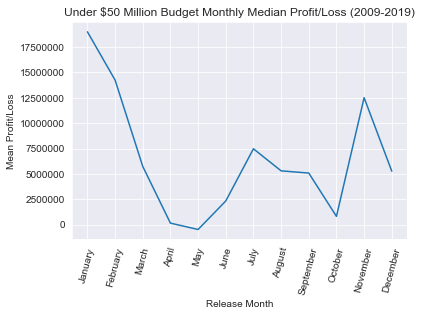

In [1318]:
cats = ('January','February','March','April','May','June','July','August','September','October','November','December')
small_budget['release_month'] = pd.Categorical(small_budget['release_month'], ordered=True, categories=cats)
ax = sns.lineplot(x='release_month',y='profit/loss',data=small_budget,estimator=np.median, ci=None)
ax.tick_params(axis='x',rotation=75)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Mean Profit/Loss")
ax.set_xlabel("Release Month")
ax.set_title("Under $50 Million Budget Monthly Median Profit/Loss (2009-2019)")

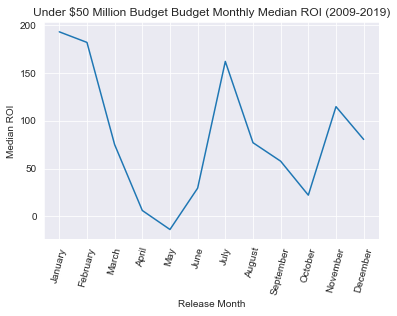

In [1327]:
ax = sns.lineplot(x='release_month',y='roi',data=small_budget, estimator=np.median, ci=None)
ax.tick_params(axis='x',rotation=75)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Median ROI")
ax.set_xlabel("Release Month")
ax.set_title("Under $50 Million Budget Budget Monthly Median ROI (2009-2019)")
sns.set_style("darkgrid")

Small budget films show high ROI January and February as well as July.  

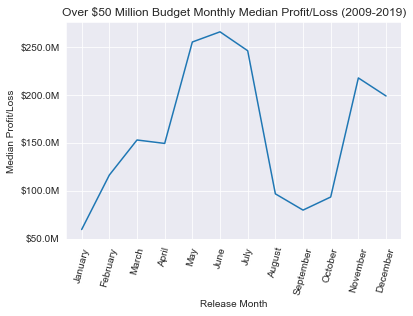

In [1328]:
cats = ('January','February','March','April','May','June','July','August','September','October','November','December')
big_budget['release_month'] = pd.Categorical(big_budget['release_month'],categories=cats, ordered=True)
ax = sns.lineplot(x='release_month',y='profit/loss',data=big_budget,ci=None)
ax.tick_params(axis='x',rotation=75)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Median Profit/Loss")
ax.set_xlabel("Release Month")
ax.set_title("Over $50 Million Budget Monthly Median Profit/Loss (2009-2019)")
ax.yaxis.set_major_formatter(currency)




Text(0.5, 1.0, 'Over $50 Million Budget Budget Monthly Median ROI (2009-2019)')

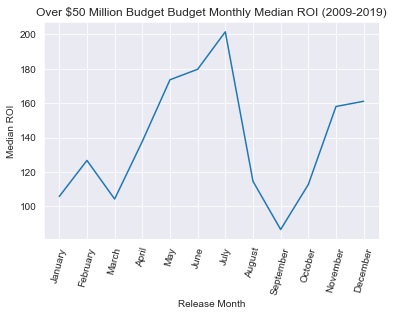

In [1329]:
ax = sns.lineplot(x='release_month',y='roi',data=big_budget,estimator=np.median, ci=None)
ax.tick_params(axis='x',rotation=75)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Median ROI")
ax.set_xlabel("Release Month")
ax.set_title("Over $50 Million Budget Budget Monthly Median ROI (2009-2019)")

Larger budget films show the best return in the summer months, this seems intuitive to the summer blockbuster idea. What this seems to indicate is potential for return from smaller budget films in the early part of the year. Larger budget movies do the best in May, June, and July. 



### Movie Genre 

Another area of exploration is movie genre. I will once again subdivide into a lower and higher budget movies for the purpose of genre understanding. 

In [1247]:
#Create a column that takes the genre column of genre strings and it into a column of
#genre list.
filter_merge['genre'] = filter_merge['genres'].map(lambda x: x.split(','))

#Use the explode method to give each genre its own entry for plotting
genre_merge = filter_merge.explode('genre')


In [1248]:
#Cleaning the genre column.
genre_merge['genre']= genre_merge['genre'].map(lambda x: x.strip())

### Distribution of Genre

In [1249]:
#Looking at the value counts to determine the most popular genres.
genre_merge['genre'].value_counts()

Drama                        932
Comedy                       627
Action & Adventure           564
Mystery & Suspense           426
Science Fiction & Fantasy    322
Horror                       211
Kids & Family                169
Romance                      161
Animation                    128
Art House & International     78
Musical & Performing Arts     55
Documentary                   46
Special Interest              39
Western                       19
Sports & Fitness              14
Classics                       8
Faith & Spirituality           7
Television                     3
Cult Movies                    2
Name: genre, dtype: int64

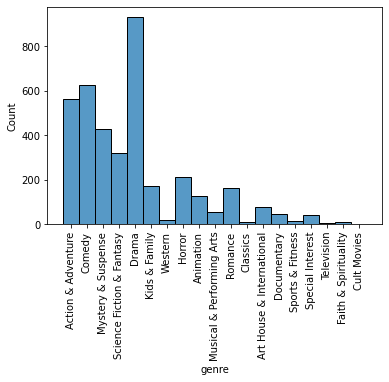

In [1254]:
ax = sns.histplot(data=genre_merge,x='genre')
ax.tick_params(axis='x',rotation=90)

The histrogram and value counts above show an uneven distribution  of genre, with genre being the most popular. In order to have some worthwhile data, I'll restrict the genre evelation to genres with over a 100 entries.

In [1255]:
genre_merge = genre_merge[genre_merge['genre'].map(genre_merge['genre'].value_counts()) > 100]

In [1256]:
genre_merge

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit/loss,roi,release_month,...,original_release_date,genres,runtime,tomatometer_rating,audience_rating,directors,content_rating,production_company,release_string_y,genre
0,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,"2,351,345,279.00",553.26,December,...,2009-12-18,"Action & Adventure, Comedy, Mystery & Suspense...",155.00,82.00,82.00,James Cameron,PG-13,20th Century Fox,2009-12,Action & Adventure
0,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,"2,351,345,279.00",553.26,December,...,2009-12-18,"Action & Adventure, Comedy, Mystery & Suspense...",155.00,82.00,82.00,James Cameron,PG-13,20th Century Fox,2009-12,Comedy
0,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,"2,351,345,279.00",553.26,December,...,2009-12-18,"Action & Adventure, Comedy, Mystery & Suspense...",155.00,82.00,82.00,James Cameron,PG-13,20th Century Fox,2009-12,Mystery & Suspense
0,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,"2,351,345,279.00",553.26,December,...,2009-12-18,"Action & Adventure, Comedy, Mystery & Suspense...",155.00,82.00,82.00,James Cameron,PG-13,20th Century Fox,2009-12,Science Fiction & Fantasy
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011,"635,063,875.00",154.67,May,...,2011-05-20,"Action & Adventure, Comedy, Science Fiction & ...",136.00,33.00,54.00,"Dariusz Wolski, Rob Marshall",PG-13,Walt Disney Pictures,2011-05,Action & Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,45,2017-01-27,Emily,"27,000.00","3,547.00","3,547.00",2017,"-23,453.00",-86.86,January,...,2017-01-27,"Action & Adventure, Drama, Mystery & Suspense,...",91.00,69.00,39.00,Adam Randall (II),NR,Netflix,2017-01,Science Fiction & Fantasy
2124,49,2015-09-01,Exeter,"25,000.00",0.00,"489,792.00",2015,"464,792.00","1,859.17",September,...,2015-09-17,Drama,124.00,90.00,77.00,Seung-wan Ryoo,NR,CJ Entertainment,2015-09,Drama
2125,61,2010-04-02,Breaking Upwards,"15,000.00","115,592.00","115,592.00",2010,"100,592.00",670.61,April,...,2010-04-02,"Drama, Romance",88.00,60.00,57.00,Daryl Wein,NR,IFC Films,2010-04,Drama
2125,61,2010-04-02,Breaking Upwards,"15,000.00","115,592.00","115,592.00",2010,"100,592.00",670.61,April,...,2010-04-02,"Drama, Romance",88.00,60.00,57.00,Daryl Wein,NR,IFC Films,2010-04,Romance


### Spltting Genre by Prodution Budget

In [1260]:
higher_genre_merge = genre_merge[genre_merge['production_budget']>50000000]
lower_genre_merge = genre_merge[genre_merge['production_budget']<50000000]

In [1262]:
genre_plot = genre_merge.groupby('genre').median()[['roi','profit/loss','production_budget']].reset_index()

higher_genre = higher_genre_merge.groupby('genre').median()[['roi','profit/loss','production_budget']].reset_index()

lower_genre = lower_genre_merge.groupby('genre').median()[['roi','profit/loss','production_budget']].reset_index()

### Genre Ranked by ROI

In [1263]:
higher_genre = higher_genre_merge.groupby('genre').median()[['roi','profit/loss','production_budget']].reset_index()
higher_profit = higher_genre.sort_values(by='profit/loss',ascending=False)
higher_roi = higher_genre.sort_values(by='roi',ascending=False)

In [1265]:
lower_genre = lower_genre_merge.groupby('genre').median()[['roi','profit/loss','production_budget']].reset_index()
lower_profit = lower_genre.sort_values(by='profit/loss',ascending=False)
lower_roi = lower_genre.sort_values(by='roi',ascending=False)

In [1266]:
genre_roi_ranked = genre_plot.sort_values(by='roi',ascending=False)
genre_profit_ranked = genre_plot.sort_values(by='profit/loss',ascending=False)
genre_profit_ranked

,genre,roi,profit/loss,production_budget
1,Animation,183.88,"164,395,909.50","82,500,000.00"
5,Kids & Family,169.80,"133,691,277.00","76,000,000.00"
8,Science Fiction & Fantasy,133.72,"90,704,059.00","90,000,000.00"
0,Action & Adventure,123.08,"66,799,550.50","60,000,000.00"
4,Horror,179.74,"28,031,715.00","10,000,000.00"
2,Comedy,134.04,"27,367,022.00","24,000,000.00"
7,Romance,124.19,"22,004,627.00","23,000,000.00"
6,Mystery & Suspense,92.61,"16,997,435.50","20,000,000.00"
3,Drama,78.45,"12,087,643.00","20,000,000.00"


### Overall Genre Performance

Text(0.5, 1.0, 'Movie Genres Ranked by Median ROI')

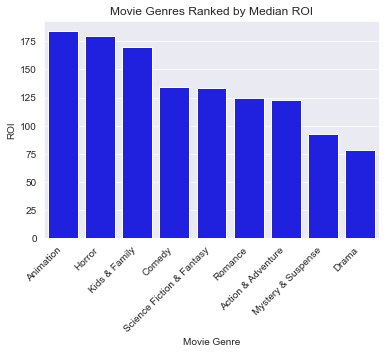

In [1331]:
import numpy as np
ax = sns.barplot(data=genre_roi_ranked,x='genre',y='roi',estimator=np.median, color='blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.set_ylabel('ROI')
ax.set_xlabel('Movie Genre')
ax.set_title('Movie Genres Ranked by Median ROI')

Text(0.5, 1.1, 'Performance Per Genre')

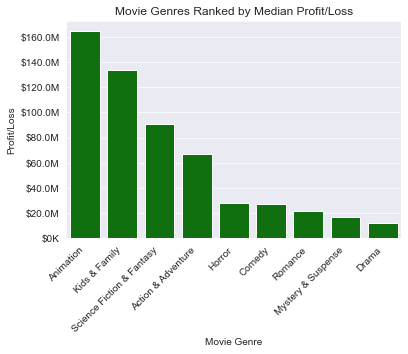

In [1333]:
ax = sns.barplot(data=genre_profit_ranked,x='genre',y='profit/loss',estimator=np.median, color='green')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.set_ylabel('Profit/Loss')
ax.set_xlabel('Movie Genre')
ax.set_title('Movie Genres Ranked by Median Profit/Loss')
ax.yaxis.set_major_formatter(currency)
fig.suptitle('Performance Per Genre', fontsize=25, y=1.1)

When it comes to overall ROI, Animation leads the way and is also the genre of most pure profit. Horror ranks high as ROI, but low on overall profit. Kids & Family films perform well in both tiers as well.

### Large Genre Performance

Text(0.5, 1.0, 'Movie Genres Ranked by Median ROI (Over $50 Million Budget)')

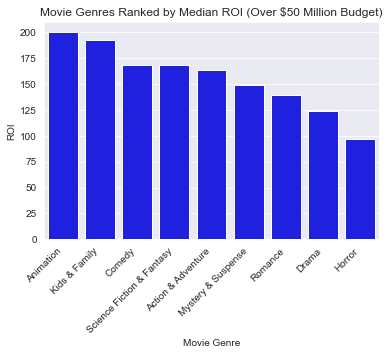

In [1335]:

ax = sns.barplot(data=higher_roi,x='genre',y='roi',color='blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.set_ylabel('ROI')
ax.set_xlabel('Movie Genre')
ax.set_title('Movie Genres Ranked by Median ROI (Over $50 Million Budget)')



Text(0.5, 1.1, 'Larger Budget Performance (Over $50 Million)')

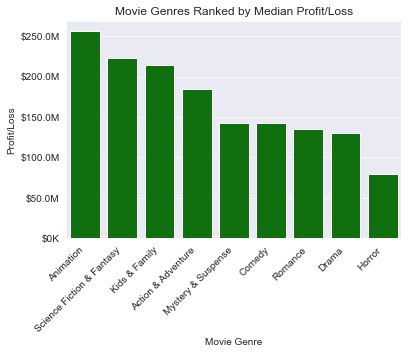

In [1336]:
ax = sns.barplot(data=higher_profit,x='genre',y='profit/loss',color='green')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.set_ylabel('Profit/Loss')
ax.set_xlabel('Movie Genre')
ax.set_title('Movie Genres Ranked by Median Profit/Loss')
ax.yaxis.set_major_formatter(currency)
fig.suptitle('Larger Budget Performance (Over $50 Million)', fontsize=25, y=1.1)

Animation stays atop the charts, and comedy moves up when keeping higher tier genre. Sci-Fi also ranks higher when removing lower budget genres.

### Lower Budget Genre Performance

Text(0.5, 1.0, 'Movie Genres Ranked by Median ROI (Under $50 Million Budget)')

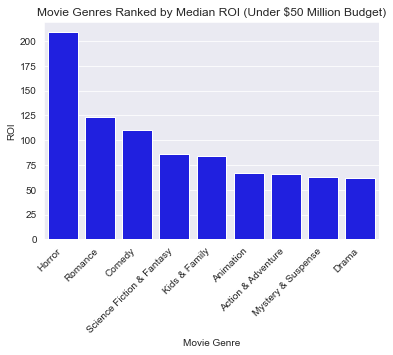

In [1339]:

ax = sns.barplot(data=lower_roi,x='genre',y='roi',color='blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.set_ylabel('ROI')
ax.set_xlabel('Movie Genre')
ax.set_title('Movie Genres Ranked by Median ROI (Under $50 Million Budget)')



Text(0.5, 1.1, 'Lower Budget Performance (Under $50 Million)')

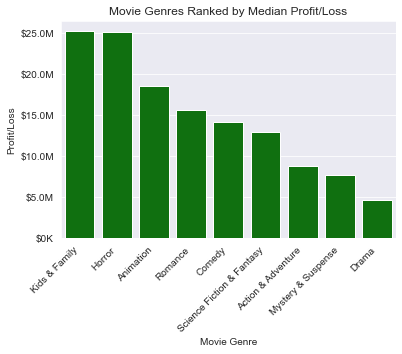

In [1340]:
ax = sns.barplot(data=lower_profit,x='genre',y='profit/loss',color='green')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.set_ylabel('Profit/Loss')
ax.set_xlabel('Movie Genre')
ax.set_title('Movie Genres Ranked by Median Profit/Loss')
ax.yaxis.set_major_formatter(currency)
fig.suptitle('Lower Budget Performance (Under $50 Million)', fontsize=25, y=1.1)

Horror leads the way amongst lower budget films. Comedy seems to offer returns in both tiers of films. Lower budgeted animation films do not seem to perform as well. 

Overall it seems that animation is the best in terms of ROI and overall profit, though in lower budget films this is less so. 

Drama ranks as the number one in terms o releases, but is a poor area of ROI.

### Production Budget

From a production budget standpoint, I'm going to try to understand if a greater investment into a film means a positive return-on-investment. 

[Text(0, 0.5, 'Profit/Loss')]

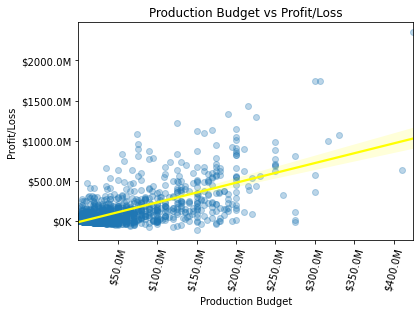

In [1277]:
ax = sns.regplot(data=filter_merge,x='production_budget',y='profit/loss',line_kws={"color": "yellow"},scatter_kws={'alpha':0.3})
ax.xaxis.set_major_formatter(currency)
ax.yaxis.set_major_formatter(currency)
ax.tick_params(axis='x',rotation=75)
ax.set_title('Production Budget vs Profit/Loss')
ax.set(xlabel='Production Budget')
ax.set(ylabel='Profit/Loss')


From a pure profit/loss perspective there seems to be an upward trend line of budget and profit/loss, but given the grouping of data, it will probably be helpful to bin the data into different budgetary categories.

[Text(0, 0.5, 'ROI')]

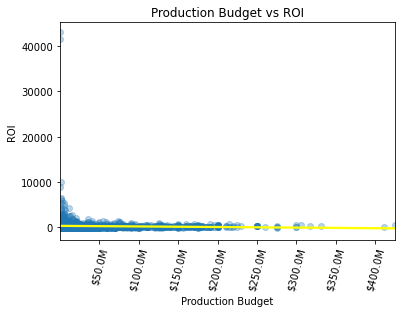

In [1278]:
ax = sns.regplot(data=filter_merge,x='production_budget',y='roi',line_kws={"color": "yellow"},scatter_kws={'alpha':0.3})
ax.xaxis.set_major_formatter(currency)
ax.tick_params(axis='x',rotation=75)
ax.set_title('Production Budget vs ROI')
ax.set(xlabel='Production Budget')
ax.set(ylabel='ROI')

A scatterplot of the relationship to budget and ROI is even less helpful. Let's look at the correlation between the two columns.

In [1119]:
filter_merge.corr()['production_budget']

id                   -0.06
production_budget     1.00
domestic_gross        0.73
worldwide_gross       0.80
release_year          0.06
profit/loss           0.69
roi                  -0.05
runtime               0.39
tomatometer_rating    0.02
audience_rating       0.14
Name: production_budget, dtype: float64

There looks to be a negative correlation between production budget and ROI, however it will be worth exploring if this. I will try to understand more about the relationship of ROI and production budget.

I want to know simply overall what percentage of films are at all profitable.

In [1121]:
#Look at the percentage of profitable films overall.
index = filter_merge[filter_merge['roi']>0].index
len(index)/len(filter_merge)


0.7205333333333334

In [1122]:
#Look at unprofitable films overal..
index = filter_merge[filter_merge['roi']<0].index
len(index)/len(filter_merge)

0.27946666666666664

#### Spread of Production Budgets

Dividing the number of films with positive ROI by the total number of entries shows that 72% of films show a positive return. Let's now take a look at where that spread is distributed.

A simple histogram shows that the production budgets are greatly skewed to the left side. There are far more movies with lower budgets than higher budgets.


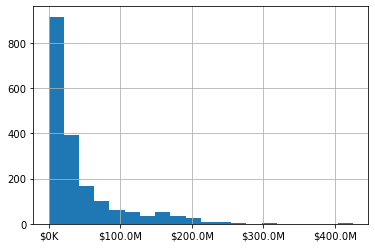

In [1279]:
ax = filter_merge['production_budget'].hist(bins=20)      
ax.xaxis.set_major_formatter(currency)

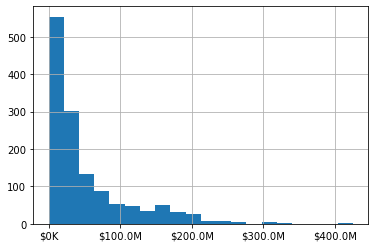

In [1280]:
ax = filter_merge[filter_merge['roi']>0]['production_budget'].hist(bins=20)
ax.xaxis.set_major_formatter(currency)

In [1281]:
filter_merge[filter_merge['roi']>0]['production_budget'].median()

30000000.0

The spread of profitable movies skews towards the left, as matching the overall production budgets.

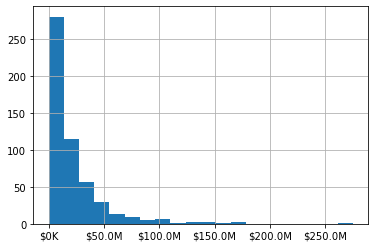

In [1282]:
ax = filter_merge[filter_merge.roi<0]['production_budget'].hist(bins=20)
ax.xaxis.set_major_formatter(currency)

In [1283]:
filter_merge[filter_merge['roi']<0]['production_budget'].median()

12000000.0

The skew of production budgets under profitable movies skews to the left.

#### Dividing into Budget Categories

In order to get a better look at the production budget, I choose to divide the dataframe into categorical bins for further exploration.

I am able to use the helpful function "qcut" to divide the data into equal distrubuted categorical budget bins.

In [1284]:
bin_labels_6 = ['Smallest Budget', 'Small Budget', 'Medium Budget', 'Big Budget', 'Biggest Budget']

filter_merge['budget_size']=pd.qcut(filter_merge['production_budget'], q=5, labels =bin_labels_6)

There are now categories of budget to analyze of nearly even length. 

In [1285]:
filter_merge['budget_size'].value_counts()

Smallest Budget    387
Medium Budget      375
Biggest Budget     372
Big Budget         370
Small Budget       363
Name: budget_size, dtype: int64

In [1286]:
print(f"The categorical bins I have created are Smallest Budget ranging from {Smallest_Budget_df['production_budget'].min()} to {Smallest_Budget_df['production_budget'].max()}\n"
f"Small Budget ranging  from {Small_Budget_df['production_budget'].min()} to {Small_Budget_df['production_budget'].max()}\n"
f"Medium Budget ranging  from {Medium_Budget_df['production_budget'].min()} to {Medium_Budget_df['production_budget'].max()}\n"
f"Big Budget ranging  from {Big_Budget_df['production_budget'].min()} to {Big_Budget_df['production_budget'].max()}\n"
f"Biggest Budget ranging  from {Biggest_Budget_df['production_budget'].min()} to {Biggest_Budget_df['production_budget'].max()}\n")

The categorical bins I have created are Smallest Budget ranging from 9000.0 to 6000000.0
Small Budget ranging  from 6400000.0 to 16000000.0
Medium Budget ranging  from 16800000.0 to 31000000.0
Big Budget ranging  from 31500000.0 to 66000000.0
Biggest Budget ranging  from 67500000.0 to 425000000.0



#### ROI Per Budget Category

A boxplot will be able to show how ROI is distributed per budget category. 

Text(0.5, 1.0, 'Spread of ROI per Budget Category')

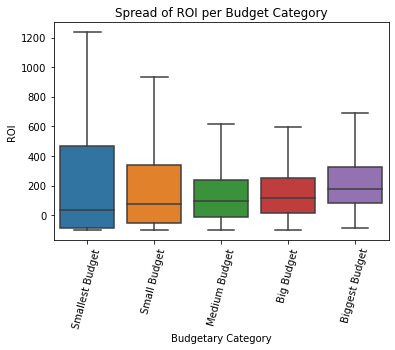

In [1131]:
#Boxplot to show the spread of ROI per budget size.
ax = sns.boxplot(data=filter_merge,x='budget_size',y='roi', showfliers=False)
ax.tick_params(axis='x',rotation=75)
ax.set_ylabel("ROI")
ax.set_xlabel("Budgetary Category")
ax.set_title("Spread of ROI per Budget Category")

The above boxplot shows that broken down into category, when eliminating outliers, the Smallest Budget category shows the greatest range of ROI. What is worth investigating is the percentage of movies with negative ROI per category. I would like to know which if spending more money can help avoid a negative ROI. 



In [1132]:
#Creating seperate dataframes per budget category
Biggest_Budget_df = filter_merge[filter_merge.budget_size=='Biggest Budget'].copy()
Big_Budget_df = filter_merge[filter_merge.budget_size=='Big Budget'].copy()
Medium_Budget_df = filter_merge[filter_merge.budget_size=='Medium Budget'].copy()
Small_Budget_df = filter_merge[filter_merge.budget_size=='Small Budget'].copy()
Smallest_Budget_df = filter_merge[filter_merge.budget_size=='Smallest Budget'].copy()

In [1133]:
#Putting the Budgets into a list for later use.
Budgets = [Biggest_Budget_df,Big_Budget_df,Medium_Budget_df,Small_Budget_df,Smallest_Budget_df]

I will now create a grouped dataframe that shows a description of the ROI of each budget category.

In [1134]:
#Grouping by genre and reseting the index.
budget_df = filter_merge.groupby(by='budget_size').describe()['roi']
budget_df.reset_index(inplace=True)
budget_df


,budget_size,count,mean,std,min,25%,50%,75%,max
0,Smallest Budget,388.00,677.79,"3,223.69",-100.00,-83.41,34.00,466.43,"43,051.79"
1,Small Budget,363.00,247.43,520.80,-99.99,-55.19,77.04,341.90,"4,389.57"
2,Medium Budget,377.00,170.59,291.83,-99.48,-13.51,94.09,239.75,"2,031.76"
3,Big Budget,372.00,177.32,259.40,-99.95,14.26,117.07,248.91,"1,892.74"
4,Biggest Budget,375.00,225.68,217.79,-88.28,79.30,174.76,322.63,"1,468.02"


When ranking the budget categories by budget size, the biggest budget shows the highest median ROI.

Text(0.5, 1.0, 'Median ROI per Budget Category')

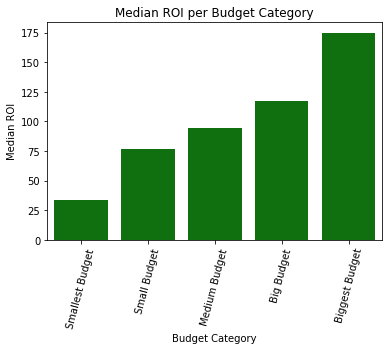

In [1135]:
#Creating a plot that displays the median ROI per budget category.
ax = sns.barplot(data=budget_df, x='budget_size',y='50%',color='green')
ax.tick_params(axis='x',rotation=75)
ax.set_ylabel('Median ROI')
ax.set_xlabel('Budget Category')
ax.set_title('Median ROI per Budget Category')

This plot show the lowest ROI per budget category, the floor for each budget category. The biggest budget category, has the lowest floor.

Text(0.5, 1.0, 'Lowest ROI per Budget Category')

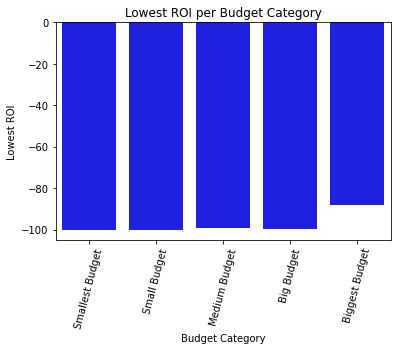

In [1136]:
#Barplot that displays the minimym ROI per budget category.
ax = sns.barplot(data=budget_df, x='budget_size',y='min',color='blue')
ax.tick_params(axis='x',rotation=75)
ax.set_ylabel('Lowest ROI')
ax.set_xlabel('Budget Category')
ax.set_title('Lowest ROI per Budget Category')

#### Percentage of Proftibale Movies Per Budget Category

I want to display how many films are profitable per budget category as well. I create a simple column for profitable vs unprofitable.

In [1137]:
#New Column of Proft vs Losing Money
filter_merge['Profitable'] = ['Yes' if x >= 0 else 'No' for x in filter_merge['roi']]


In [1138]:
#New aggregate dataframe displays the budget categories and then splits them into a percentage of proftiable vs unprofitable. 
df_plot = filter_merge.groupby(['Profitable', 'budget_size']).size().reset_index().pivot(columns='Profitable', index='budget_size', values=0)
stacked_data = df_plot.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.reset_index(inplace=True)
stacked_data

Profitable,budget_size,No,Yes
0,Smallest Budget,43.56,56.44
1,Small Budget,38.29,61.71
2,Medium Budget,28.38,71.62
3,Big Budget,20.97,79.03
4,Biggest Budget,8.27,91.73


The stacked bar chart plainly shows that as budget rises, the profit percentage per budget category rises as well.

Text(0.5, 1.0, 'Profitable Films Per Budget Category')

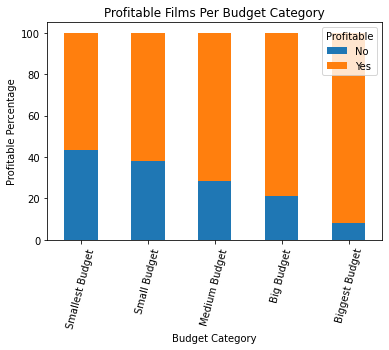

In [1139]:
#Creating bar chart, and selecting stacked to be True.
ax = stacked_data.plot(kind='bar', stacked=True)
ax.set_xticklabels(stacked_data['budget_size'])
ax.tick_params(axis='x',rotation=75)
ax.set_ylabel('Profitable Percentage')
ax.set_xlabel('Budget Category')
ax.set_title('Profitable Films Per Budget Category')

#### Summary

Given these insights, we can further dive into the Biggest Budget category and again look at another scatterplot.

[Text(0, 0.5, 'ROI')]

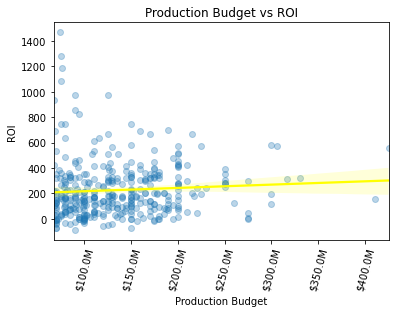

In [1140]:
ax = sns.regplot(data=Biggest_Budget_df,x='production_budget',y='roi',line_kws={"color": "yellow"},scatter_kws={'alpha':0.3})
ax.xaxis.set_major_formatter(currency)
ax.tick_params(axis='x',rotation=75)
ax.set_title('Production Budget vs ROI')
ax.set(xlabel='Production Budget')
ax.set(ylabel='ROI')

The trend line above shows us that there is a very low rise in ROI as budget increases, lifting out of the negative return zone. Interestingly, the highest ROI are around $50 Million area. I will take at a look at the correlation per budget category.

In [1141]:
for budget in Budgets:
    print(budget.corr()['production_budget']['roi'])


0.06808150885317141
-0.022133666140544597
-0.05629817687077755
0.011965836925086366
-0.11478529772085477


When looking at the correlation per budget category, the ROI correlation is relatively weak per category, but highest in the biggest budget category.

The biggest budget category showed the highest median ROI, with the lowest floor, and the greatest percentage of profitable films per budget category. The smallest budget movies showed the highest ROI, but also the greatest percentage of financial losers.

## Conclusions
This analysis leads to three recommendations for Microsoft's Movie Studiio:
* **Stick to the Traditional Blockbuster Film Release Season for Big Budget Movies** Big Budget movies show a better return and perform better in the summer months and November and December. There is opportunity early the year for lower budget films.<br />
* **Genre returns will depend on Budget Tier** Horror, Comedy, and Romance offer great opportunity for ROI for lower budgets. Animation, Kids & Family, and Comedy perform offer the best ROI for larger budget films. Animation offers the best ROI for big budget films. Drama appears to be a bad investment for big and small budgets.   
* **Biggest Budget films produce the most reliable returns** The Smallest budget tier offers a chance for the highest ROI, but the highest percentage of failures. Movies over $60 Million have the lowest rate of failure.
***

## Next Steps
Further analyses could yield additional insights to help launch a film studio:


***
* **Obtain Streaming Data** The future of releases seems to be in streaming at home movies post-pandemic. 
It would be best to be able to understand how streaming affects theatrical releases.
* **Dive Further into Budget Tiers** It would be helpful to subdivide the budgets before looking at genre and time of year to have a better understanding of seasonality and genre.
* **Understanding multi-genre films** Movies are multi-genre in the analysis, it would be helpful to know what genre pulled audience towards the films. Audience survey data might helpful. 
* **Greater Understanding of Marketing Budgets** The data shows the performance of films, but what went in to that failure? Do the more successful films have better marketing and advertising budgets, maybe this is a separate consideration.
***